<a href="https://colab.research.google.com/github/Rayeeeeen/Application-of-the-EVT-on-Cryptcurrency-returns/blob/main/EVT_applied_on_the_expected_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import shapiro,kstest, norm
import statsmodels.api as sm
from scipy.stats import genpareto


In [ ]:
expc_returns=pd.read_csv("/content/expected_returns.csv")
"""new_columns = {}
new_rows = {}
for i in range(len(expc_returns.columns)):
    new_columns[expc_returns.columns[i]] = "path" + np.str(i)
    expc_returns.rename(columns=new_columns, inplace=True)
for j in range(len(expc_returns.index)):
    new_rows[expc_returns.index[j]] = "day" + np.str(j)
    expc_returns.rename(index=new_rows, inplace=True)   """




expc_returns.head(10)

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,0.000000000000000000e+00.9990,0.000000000000000000e+00.9991,0.000000000000000000e+00.9992,0.000000000000000000e+00.9993,0.000000000000000000e+00.9994,0.000000000000000000e+00.9995,0.000000000000000000e+00.9996,0.000000000000000000e+00.9997,0.000000000000000000e+00.9998,0.000000000000000000e+00.9999
0,-0.01,1.000000e-02,1.000000e-02,2.000000e-02,4.440892e-16,-1.000000e-02,4.440892e-16,4.440892e-16,1.000000e-02,0.01,...,1.000000e-02,-2.000000e-02,4.440892e-16,-1.000000e-02,0.01,-2.000000e-02,4.000000e-02,1.000000e-02,4.000000e-02,-1.000000e-02
1,0.03,1.000000e-02,4.440892e-16,1.000000e-02,4.440892e-16,-3.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.01,...,1.000000e-02,4.440892e-16,1.000000e-02,4.440892e-16,-0.02,-3.000000e-02,4.440892e-16,4.440892e-16,1.000000e-02,1.000000e-02
2,-0.01,4.440892e-16,4.000000e-02,4.440892e-16,-1.000000e-02,3.000000e-02,1.000000e-02,1.000000e-02,7.000000e-02,0.02,...,1.000000e-02,-6.000000e-02,-1.000000e-02,-1.000000e-02,0.01,-2.000000e-02,4.440892e-16,7.000000e-02,1.000000e-02,4.440892e-16
3,0.01,1.000000e-02,-1.000000e-02,-4.000000e-02,-6.000000e-02,1.000000e-02,-1.000000e-02,-1.000000e-02,4.440892e-16,-0.01,...,4.440892e-16,-6.000000e-02,-2.000000e-02,-3.000000e-02,-0.02,5.000000e-02,-4.000000e-02,-5.000000e-02,-3.000000e-02,-4.000000e-02
4,0.04,-2.000000e-02,-9.000000e-02,-1.000000e-02,-5.000000e-02,2.000000e-02,-4.000000e-02,2.000000e-02,3.000000e-02,0.04,...,4.440892e-16,2.000000e-02,5.000000e-02,1.000000e-02,-0.02,-1.000000e-02,-4.000000e-02,-5.000000e-02,-1.000000e-02,-4.000000e-02
5,0.02,4.440892e-16,3.000000e-02,1.000000e-02,5.000000e-02,2.000000e-02,-1.000000e-02,3.000000e-02,-2.000000e-02,0.02,...,-1.000000e-02,-3.000000e-02,3.000000e-02,3.000000e-02,0.01,-2.000000e-02,3.000000e-02,-1.000000e-02,-5.000000e-02,2.000000e-02
6,-0.08,3.000000e-02,1.000000e-02,-2.000000e-02,1.000000e-02,-3.000000e-02,1.000000e-02,-1.200000e-01,-3.000000e-02,-0.07,...,4.440892e-16,3.000000e-02,2.000000e-02,4.440892e-16,-0.02,4.440892e-16,-1.000000e-02,-1.000000e-02,2.000000e-02,-1.000000e-02
7,-0.02,4.440892e-16,6.000000e-02,-1.000000e-02,1.000000e-02,4.440892e-16,2.000000e-02,-5.000000e-02,-6.000000e-02,-0.01,...,1.200000e-01,4.440892e-16,-1.000000e-01,3.000000e-02,0.01,4.440892e-16,1.000000e-02,-7.000000e-02,4.440892e-16,8.000000e-02
8,-0.02,-1.000000e-02,2.000000e-02,6.000000e-02,3.000000e-02,4.000000e-02,-1.000000e-02,4.000000e-02,7.000000e-02,0.06,...,3.000000e-02,4.440892e-16,-1.200000e-01,1.000000e-01,-0.02,1.000000e-02,1.000000e-02,-5.000000e-02,-4.000000e-02,1.100000e-01
9,0.02,1.000000e-02,1.000000e-01,-3.000000e-02,4.000000e-02,5.000000e-02,4.440892e-16,-1.000000e-02,2.000000e-02,0.01,...,3.000000e-02,-2.000000e-02,1.000000e-02,4.440892e-16,0.05,1.000000e-02,1.000000e-02,2.300000e-01,5.000000e-02,-1.000000e-02


In [ ]:
expc_returns.shape

(365, 10000)

#Visualization of 10 paths

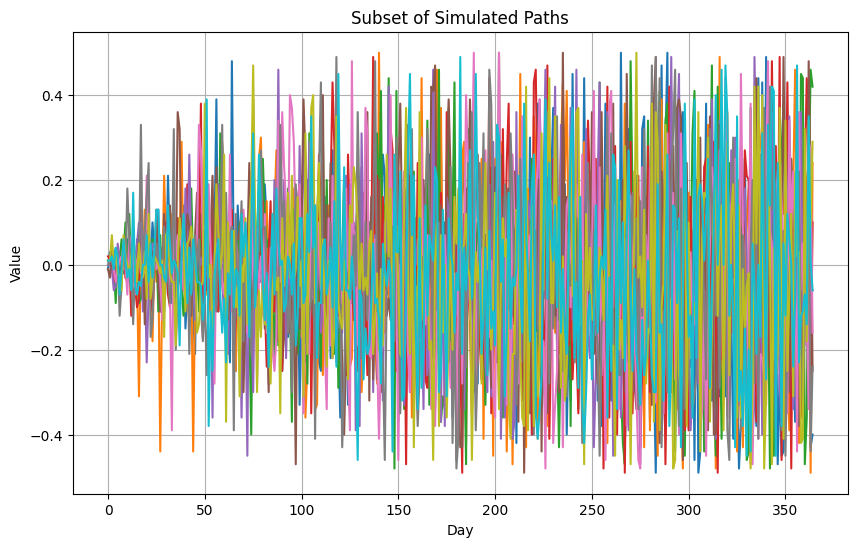

In [ ]:
subset_paths = expc_returns.columns[:10]

# Plot the selected subset of paths
plt.figure(figsize=(10, 6))
for column in subset_paths:
    plt.plot(expc_returns.index, expc_returns[column], label=column)

plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Subset of Simulated Paths')

plt.grid(True)
plt.show()

#creating the classes and their methods and functions wich are going to be used later

DailyData class that contains function to plot the daily possible returns, and to test their normality and applying other function that are related to the EVT analysis

In [ ]:
class DailyData:
    def __init__(self, data_frame,day_index):
        self.data_frame = data_frame
        self.day_index=day_index

    def extract_plot_day(self):
        if self.day_index >= self.data_frame.shape[0]:
            raise ValueError("Invalid path index")

        selected_day = self.data_frame.iloc[self.day_index,:]

        """plt.figure(figsize=(10, 6))
        sns.histplot(selected_day)

        plt.xlabel('values')
        plt.ylabel('frequence')
        plt.title(f" Extracted day {self.day_index+1}")
        plt.legend()
        plt.grid(True)
        plt.show()"""
        return selected_day


    def test_normality(self,data):
        plt.figure(figsize=(10, 4))

        sorted_data = np.sort(data)
        cumulative_probs = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

        plt.subplot(1, 2, 1)
        plt.plot(sorted_data, cumulative_probs, marker='o')
        plt.xlabel('Data')
        plt.ylabel('Cumulative Probability')
        plt.title('CDF Plot')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        sns.histplot(data , kde=True)
        plt.xlabel('Data')
        plt.ylabel('Density')
        plt.title('PDF Plot')

        plt.tight_layout()  # Adjusts the spacing between subplots
        plt.show()

        stat, p = shapiro(data)
        print("Shapiro-Wilk Test:")
        print(f"Test Statistic: {stat}")
        print(f"P-value: {p}")

        alpha = 0.05
        if p > alpha:
            print("The data follows a normal distribution (fail to reject H0)")
        else:
            print("The data does not follow a normal distribution (reject H0)")



    def exceedance(self,data,threshold):
      exceedances=[]
      for e in data:
        if e >= threshold:
          exceedances.append(e-threshold)
      return exceedances



    def mean_excess_function(self,data,u_values):

      mef_values = []

      for u in u_values:
        exceed=self.exceedance(data,u)
        mef_values.append(np.mean(exceed))

      return  mef_values


    def plot_mean_excess_fun(self,thresholds,mef_values):
      plt.scatter(thresholds, mef_values,marker="x")

      plt.xlabel("Threshold (u)")
      plt.ylabel("Mean Excess Function")
      plt.title("Mean Excess Function for Peak over Thresholds")
      plt.grid(True)
      plt.xlim(-0.6,1)
      plt.show()

    def adjusted_R_squared(self,thresholds, data):
      adj_R_squa = []
      exces=[]

      for i in range(len(thresholds) ):

        interval = thresholds[i:]
        exceedances = self.mean_excess_function(data, interval)
        exces.append(exceedances)
        model = sm.OLS(exceedances, interval).fit()
        R_squared = model.rsquared
        n = len(exceedances)
        p = 1
        adjusted_R_squared = 1 - (1 - R_squared) * (n - 1) / (n - p - 1)
        adj_R_squa.append(adjusted_R_squared)
      return adj_R_squa,exces

    def thresh_choice(self,thresholds,test):
      index = np.where(np.array(test)>=0.9)
      optimal_thresh=thresholds[index][0]
      return optimal_thresh







#creating the Estimator class

In [ ]:
class Estimator:
  def __init__(self):
    pass

  def param_estim(self,DailyData,data,thresholds,threshold):
    slp_inter = []
    interval = thresholds[thresholds>=threshold]
    exceedances = DailyData.mean_excess_function(data, interval)
    slope, intercept = np.polyfit(interval, exceedances,1)
    a = (slope, intercept)
    slp_inter.append(a)
    xi=slope/(1+slope)
    sigma=intercept/(1+slope)
    """print(f"the scale parameter : {sigma}")
    print(f"the shape parameter : {xi}")"""
    return xi,sigma

  def GDP_Function(self,x,xi,sigma):
    return 1-(1+xi*(x/sigma))**(-(1/xi))

  def Prob_density_functiopn(self,x,xi,sigma):
    return (1 / sigma) * ((1 + xi * (x / sigma)) ** (-1 / xi - 1))

  def plot_PDF_CDF(self,x_values,xi,sigma):
    xvalues = np.linspace(min(x_values), max(x_values), 1000)
    cdf_values=self.GDP_Function(xvalues,xi,sigma)
    pdf_values=self.Prob_density_functiopn(xvalues,xi,sigma)
  # Plot the GPD PDF and CDF
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
  # Plot the histogram of the data
  #plt.hist(x_values, bins=30, density=True, alpha=0.5, label='Histogram')
    plt.plot(xvalues, pdf_values, label="PDF")
    plt.xlabel("x-u")
    plt.ylabel("Probability Density")
    plt.title("Generalized Pareto Distribution PDF")
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(xvalues, cdf_values, label="CDF")
    plt.xlabel("x")
    plt.ylabel("Cumulative Probability")
    plt.title("Generalized Pareto Distribution CDF")
    plt.legend()
    plt.subplot(1, 3, 3)
    sns.histplot(x_values,kde=True)
    plt.tight_layout()
    plt.show()


  def KS_test(self,x,xi,sigma):
    synthetic_data = genpareto.rvs(xi, scale= sigma, size=len(exceed))
    # Perform the KS test
    ks_statistic, ks_p_value = scipy.stats.ks_2samp(exceed, synthetic_data)
    # Interpret the results
    if ks_p_value > 0.05:
      print("The data fits the GPD (p-value = {:.4f})".format(ks_p_value))
    else:
      print("The data significantly deviates from the GPD (p-value = {:.4f})".format(ks_p_value))
    # Plot the data and generated GPD samples
    plt.hist(exceed, bins=20, density=True, alpha=0.5, label="Data")
    plt.hist(synthetic_data, bins=20, density=True, alpha=0.5, label="Generated GPD Samples")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.title("Kolmogorov-Smirnov Test for GPD Goodness-of-Fit")
    plt.legend()
    # Show KS test results on the plot
    plt.text(0.5, 0.8, "KS Statistic: {:.4f}\nP-value: {:.4f}".format(ks_statistic, ks_p_value),
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    # Show the plot
    plt.show()




In [ ]:
class RiskMesure:
  def __init__(self):
    pass

  def var(self,xi,sigma,data,confidence_level,threshold,exceed):
    n=len(data)
    Nu=len(exceed)
    var = threshold + (sigma / xi) * ((((n/Nu)*(1 - confidence_level)) ** (-xi) )- 1)
    return var

  def expected_shortfall(self,xi,sigma,data,confidence_level,threshold,exceed):
    n=len(data)
    Nu=len(exceed)
    ES=threshold-(sigma/xi)+(sigma/((1-xi)*xi))*(((n/Nu)*(1-confidence_level))**(-xi))
    return ES

In [ ]:
df=DailyData(expc_returns,6)
selected_day=df.extract_plot_day()
selected_day

0.000000000000000000e+00        -8.000000e-02
0.000000000000000000e+00.1       3.000000e-02
0.000000000000000000e+00.2       1.000000e-02
0.000000000000000000e+00.3      -2.000000e-02
0.000000000000000000e+00.4       1.000000e-02
                                     ...     
0.000000000000000000e+00.9995    4.440892e-16
0.000000000000000000e+00.9996   -1.000000e-02
0.000000000000000000e+00.9997   -1.000000e-02
0.000000000000000000e+00.9998    2.000000e-02
0.000000000000000000e+00.9999   -1.000000e-02
Name: 6, Length: 10000, dtype: float64

In [ ]:
selected_day.describe()

count    1.000000e+04
mean     3.755000e-03
std      5.310736e-02
min     -4.500000e-01
25%     -2.000000e-02
50%      4.440892e-16
75%      3.000000e-02
max      4.100000e-01
Name: 6, dtype: float64

#Test de normalité

Test de Shapiro-Wilk : Ce test est couramment utilisé pour vérifier si une distribution suit une loi normale.

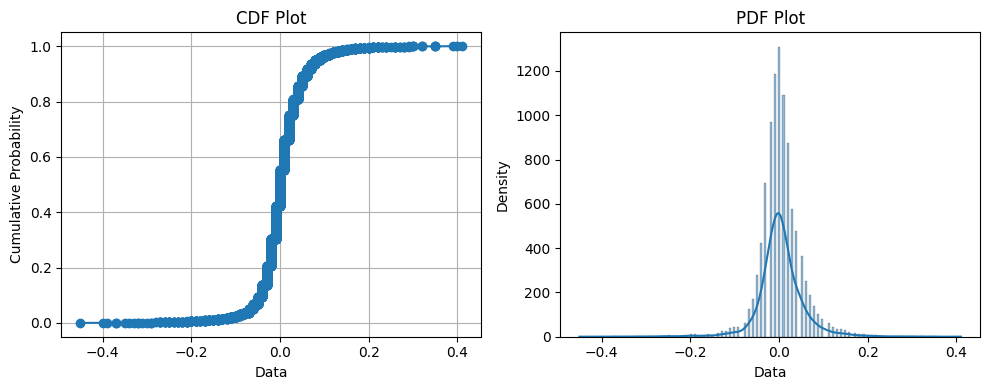

Shapiro-Wilk Test:
Test Statistic: 0.885569155216217
P-value: 0.0
The data does not follow a normal distribution (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
df.test_normality(selected_day)

#Peak over thresholds method

In [ ]:
!pip install evt

In [ ]:
import evt
from evt.dataset import Dataset
from evt.methods.block_maxima import BlockMaxima
from evt.estimators.gevmle import GEVMLE

# Comparaison between the GEV and the GEV using the Q_Q plot

In [ ]:
def GEV(data,N_SAMPLES_PER_BLOCK):
    dataset = Dataset(data*(-1))
    block_minima = BlockMaxima(dataset, N_SAMPLES_PER_BLOCK)
    mle=GEVMLE(block_minima)
    tail_estimate,loc_estimate,scale_estimate=mle.estimate()
    fig, ax = plt.subplots()
    mle.plot_qq_gev(ax)
    fig.tight_layout()
    plt.show()




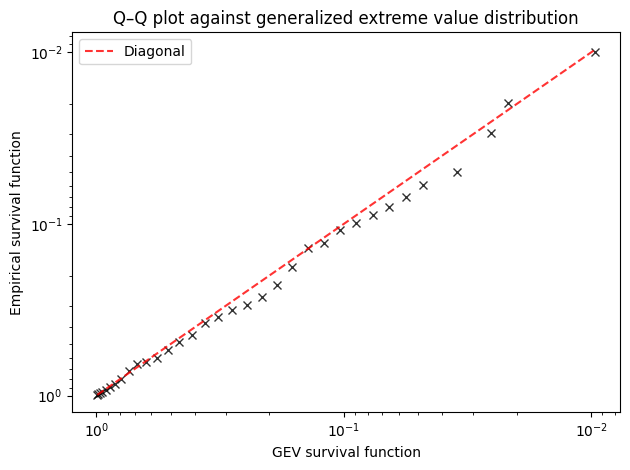

In [ ]:
GEV(selected_day,100)

In [ ]:
from evt.methods.peaks_over_threshold import PeaksOverThreshold
from evt.estimators.gpdmle import GPDMLE

In [ ]:
def GPD(data,THRESHOLD):
  DATAset=Dataset(data*(-1))
  peaks_over_threshold = PeaksOverThreshold(DATAset, THRESHOLD)
  mle1=GPDMLE(peaks_over_threshold)
  tail_estimate1, scale_estimate1=mle1.estimate()
  fig, ax=plt.subplots()
  mle1.plot_qq_gpd(ax)
  fig.tight_layout()
  plt.grid(True)
  plt.show()



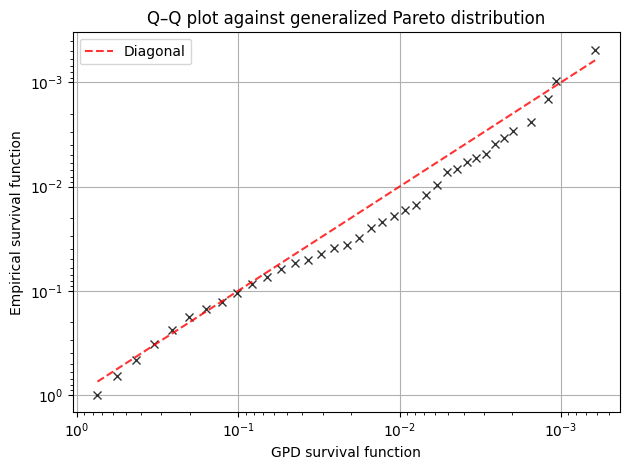

In [ ]:
GPD(selected_day,0.02)

we choose the GPD distribution to modelize the tails

estimating the parameters using the mean excess function plot

In [ ]:
thresholds=np.linspace(-0.3,0.6,100)
mef=df.mean_excess_function(selected_day*(-1),thresholds)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#Plotting the mean excess function

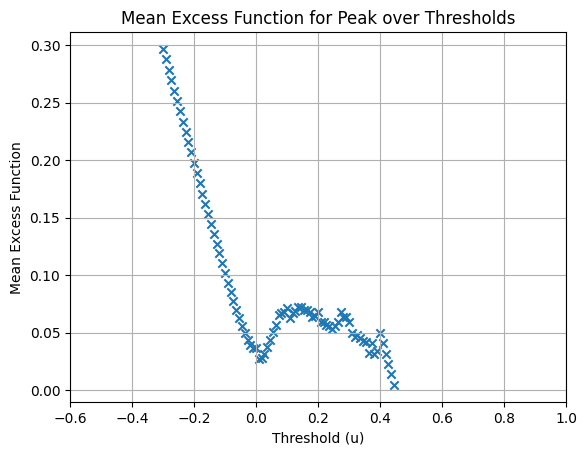

In [ ]:
df.plot_mean_excess_fun(thresholds,mef)

verifie with a predefine function

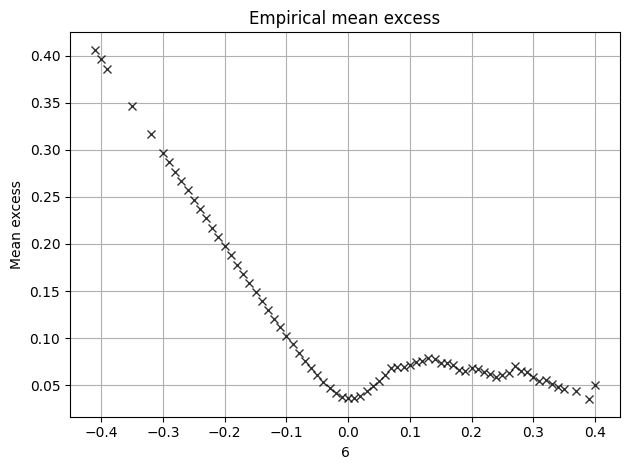

In [ ]:
fig, ax = plt.subplots()
DATA=Dataset(selected_day*(-1))
DATA.plot_mean_excess(ax)

fig.tight_layout()

plt.show()

Chosing the optimal threshold (from where we could use the GPD) based on the linearity of the mean excess plot

In [ ]:
thresholds1=np.linspace(0,0.4,100)
test,exces = df.adjusted_R_squared(thresholds1, selected_day*(-1))


<ipython-input-27-175eac14a838>:102: RuntimeWarning: divide by zero encountered in double_scalars
  adjusted_R_squared = 1 - (1 - R_squared) * (n - 1) / (n - p - 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
opt_thresh=df.thresh_choice(thresholds1,test)
opt_thresh

0.2868686868686869

Plotting the adjusted R squred of the right part of the mean excess function in function of the threshold to define the optimal threshold

(0.0, 0.5)

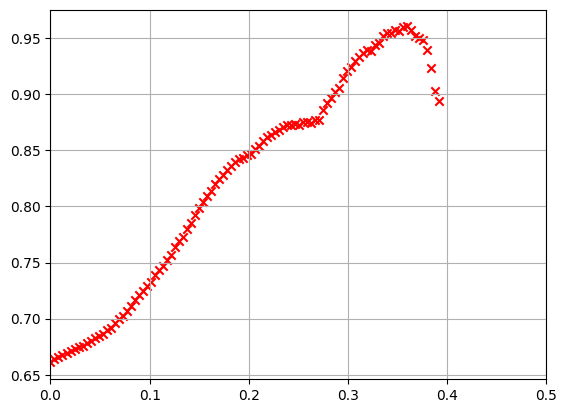

In [ ]:
plt.scatter(thresholds1,test,c='r',marker='x')

plt.grid(True)
plt.xlim(0,0.5)

#the parameter's estimation
Estimating the parameters using the lineair relation between e(u) and u

In [ ]:
estim=Estimator()
xi,sigma=estim.param_estim(df,selected_day*(-1),thresholds1,0.287)
xi,sigma

(-0.34022755652316405, 0.17581264451596854)

Plotting the PDF and the CDF

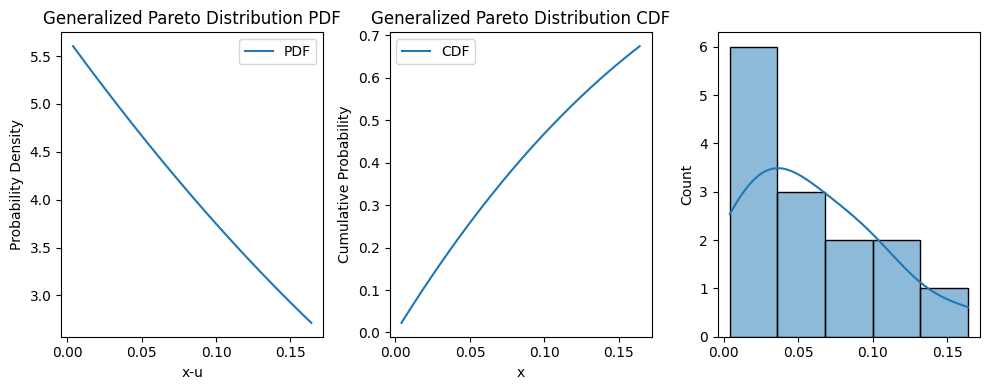

In [ ]:
exceed=df.exceedance(selected_day*(-1),0.286)
estim.plot_PDF_CDF(exceed,xi,sigma)

#statistical test

The data fits the GPD (p-value = 0.4792)


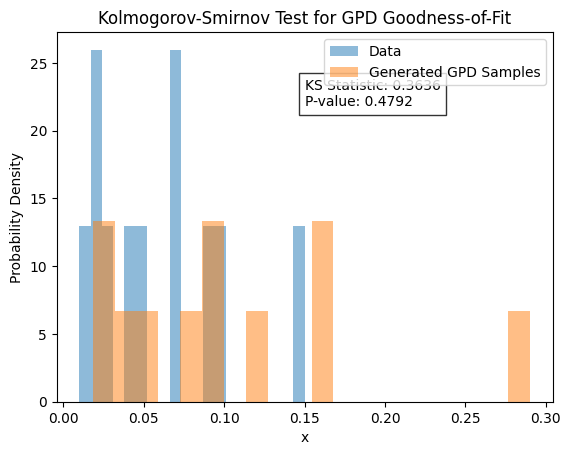

In [ ]:
estim.KS_test(exceed,xi,sigma)

#Estimating the VaR and the CVaR

In [ ]:
Risk=RiskMesure()
VaR=Risk.var(xi,sigma,selected_day*(-1),0.95,0.3,exceed)
CVaR=Risk.expected_shortfall(xi,sigma,selected_day*(-1),0.95,0.3,exceed)
VaR,CVaR

(-0.8271925316786541, -0.44633420110079425)

In [ ]:
def plot_VaR_CVaR(data_frame,threshold,thresholds1,confidence_level):

  var_list=[]
  cvar_list=[]
  for i in range(len(data_frame.index)):

    df=DailyData(data_frame,i)
    selected_day=df.extract_plot_day()
    exceed=df.exceedance(selected_day*(-1),threshold)
    estim=Estimator()
    xi,sigma=estim.param_estim(df,selected_day*(-1),thresholds1,threshold)
    Risk=RiskMesure()
    VaR=Risk.var(xi,sigma,selected_day*(-1),confidence_level,threshold,exceed)
    CVaR=Risk.expected_shortfall(xi,sigma,selected_day*(-1),confidence_level,threshold,exceed)
    var_list.append(VaR)
    cvar_list.append(CVaR)



  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)

  plt.plot(data_frame.index, var_list, label="VaR",color="r")
  plt.xlabel("day")
  plt.ylabel("VaR ")
  plt.title("VaR variation"+" "+np.str(confidence_level*100)+"%")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(data_frame.index, cvar_list, label="CVaR")
  plt.xlabel("day")
  plt.ylabel("CVaR")
  plt.title("CVaR variation"+" "+np.str(confidence_level*100)+"%")
  plt.legend("")
  plt.tight_layout()


  plt.show()





  return var_list,cvar_list






#Plotting the VaR and CVaR with respect to the time

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-50-10c47a5be037>:26: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title("VaR variation"+" "+np.str(confidence_level*100)+"%")
<ipython-input-50-10c47a5be037>:33: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe.

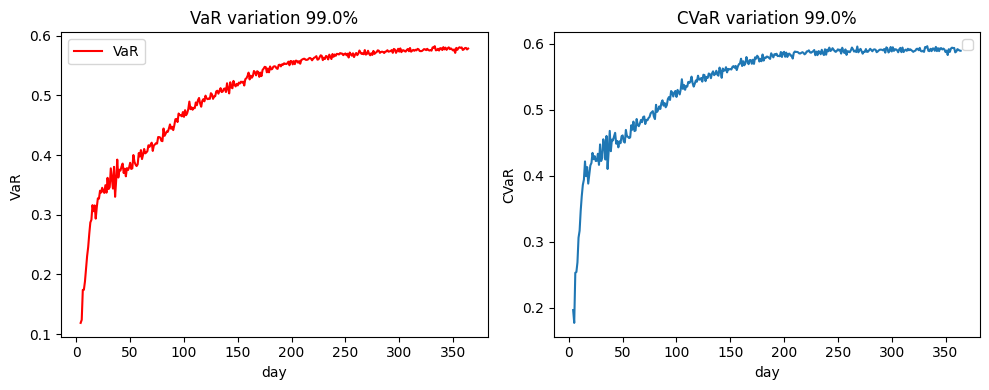

In [ ]:
var_list,cvar_list=plot_VaR_CVaR(expc_returns,0.1,thresholds1,0.99)

plotting the VaR and CVaR with the following confidence level 0,99 0,97 0,95 0,9 0,85 0,8 0,75 0,7 0,65

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-50-10c47a5be037>:26: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title("VaR variation"+" "+np.str(confidence_level*100)+"%")
<ipython-input-50-10c47a5be037>:33: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe.

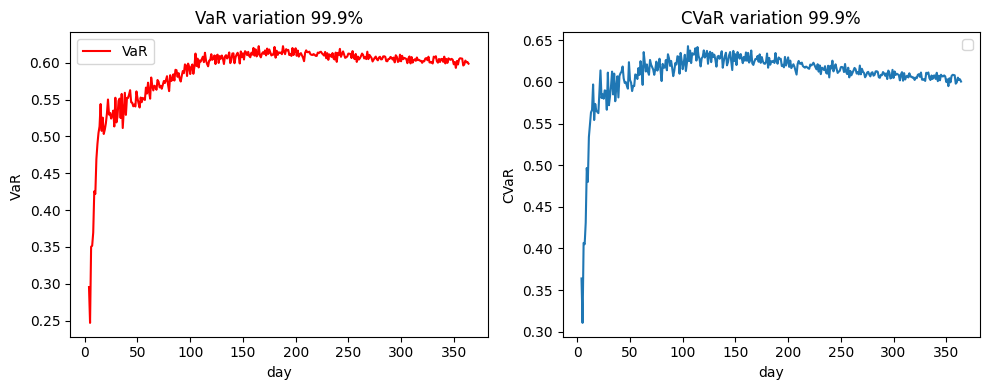

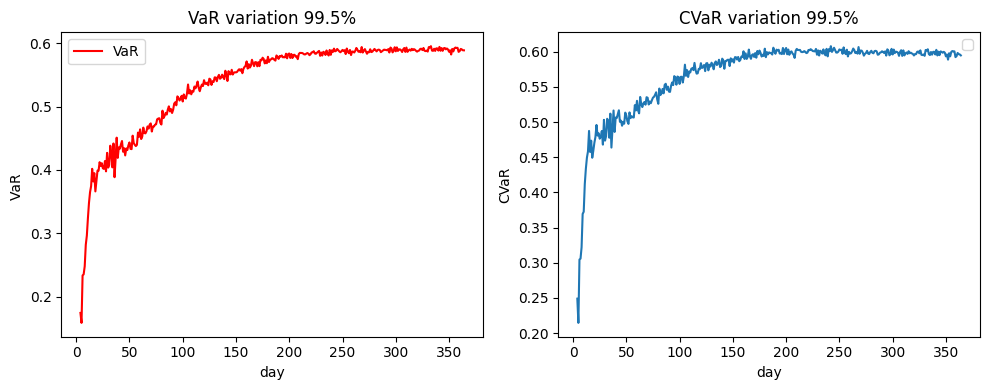

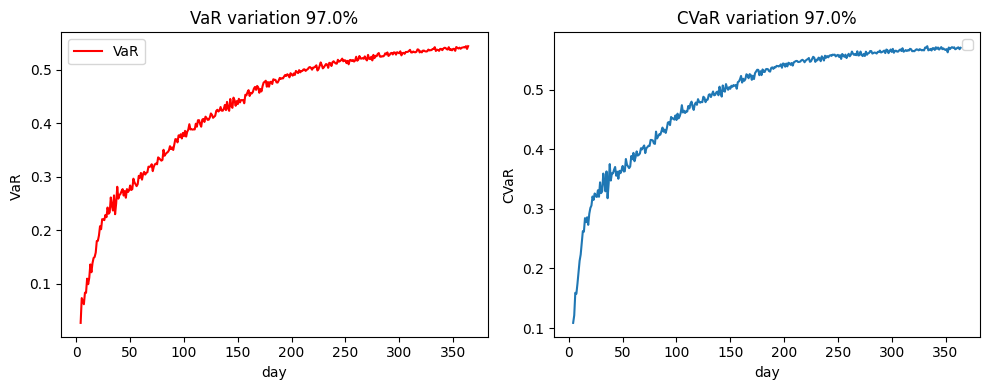

In [ ]:
alpha=[0.999,0.995,0.97]
for elem in alpha :
  plot_VaR_CVaR(expc_returns,0.1,thresholds1,elem)
